In [1]:
#ASSIGNMENT 2

In [2]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [3]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

In [4]:
#1. DATA CLEANING

In [5]:
#1.1 data_price_demand

In [6]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [7]:
print(data_price_demand.dtypes)

0     object
1     object
2    float64
3    float64
4     object
dtype: object


In [8]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand', 'Price', 'Type']
data_price_demand.columns = header_names

In [9]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [10]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                object
Date_Time    datetime64[ns]
Demand              float64
Price               float64
Type                 object
dtype: object


In [11]:
# Check for missing value
print(data_price_demand.isnull().sum())

State        0
Date_Time    0
Demand       0
Price        0
Type         0
dtype: int64


In [12]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['2022-11-01T00:30:00.000000000' '2022-11-01T01:00:00.000000000'
 '2022-11-01T01:30:00.000000000' ... '2023-04-23T23:00:00.000000000'
 '2023-04-23T23:30:00.000000000' '2023-04-24T00:00:00.000000000']
'Demand': [4178.18 4086.02 4033.37 ... 4472.49 4621.36 4395.96]
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Type': ['TRADE']


In [13]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [14]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [15]:
sum_of_demand = data_price_demand.groupby('Date')['Demand'].sum().round(2)

In [16]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand, Length: 175, dtype: float64


In [17]:
daily_demand_df = sum_of_demand.reset_index()

In [18]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date     Demand
0    2022-11-01  207429.46
1    2022-11-02  233630.93
2    2022-11-03  235672.34
3    2022-11-04  224895.28
4    2022-11-05  189190.35
..          ...        ...
170  2023-04-20  227925.10
171  2023-04-21  232043.13
172  2023-04-22  207431.82
173  2023-04-23  195560.35
174  2023-04-24    4395.96

[175 rows x 2 columns]


In [19]:
print(daily_demand_df.dtypes)

Date       object
Demand    float64
dtype: object


In [20]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [21]:
print(daily_demand_df.dtypes)

Date      datetime64[ns]
Demand           float64
dtype: object


In [22]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [23]:
#Daily total usage == maximum daily total usage in this assignment

In [24]:
print(data_weather)

                               Location        Date  Minimum temperature (°C)  \
0    Melbourne (Olympic Park), Victoria   1/11/2022                       8.5   
1    Melbourne (Olympic Park), Victoria   2/11/2022                       6.9   
2    Melbourne (Olympic Park), Victoria   3/11/2022                       9.1   
3    Melbourne (Olympic Park), Victoria   4/11/2022                      10.2   
4    Melbourne (Olympic Park), Victoria   5/11/2022                      11.8   
..                                  ...         ...                       ...   
170  Melbourne (Olympic Park), Victoria  20/04/2023                       7.8   
171  Melbourne (Olympic Park), Victoria  21/04/2023                      11.3   
172  Melbourne (Olympic Park), Victoria  22/04/2023                      14.6   
173  Melbourne (Olympic Park), Victoria  23/04/2023                      14.8   
174  Melbourne (Olympic Park), Victoria  24/04/2023                      11.0   

     Maximum temperature (°

In [25]:
data_weather.shape

(175, 22)

In [26]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [27]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [28]:
display(data_weather.head())

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [29]:
# Unique values in each columns to examine value range and current data types in the columns
for column in data_weather.columns:
    unique_values = data_weather[column].unique()
    print(f"'{column}': {unique_values}")

'Location': ['Melbourne (Olympic Park), Victoria']
'Date': ['1/11/2022' '2/11/2022' '3/11/2022' '4/11/2022' '5/11/2022' '6/11/2022'
 '7/11/2022' '8/11/2022' '9/11/2022' '10/11/2022' '11/11/2022'
 '12/11/2022' '13/11/2022' '14/11/2022' '15/11/2022' '16/11/2022'
 '17/11/2022' '18/11/2022' '19/11/2022' '20/11/2022' '21/11/2022'
 '22/11/2022' '23/11/2022' '24/11/2022' '25/11/2022' '26/11/2022'
 '27/11/2022' '28/11/2022' '29/11/2022' '30/11/2022' '1/12/2022'
 '2/12/2022' '3/12/2022' '4/12/2022' '5/12/2022' '6/12/2022' '7/12/2022'
 '8/12/2022' '9/12/2022' '10/12/2022' '11/12/2022' '12/12/2022'
 '13/12/2022' '14/12/2022' '15/12/2022' '16/12/2022' '17/12/2022'
 '18/12/2022' '19/12/2022' '20/12/2022' '21/12/2022' '22/12/2022'
 '23/12/2022' '24/12/2022' '25/12/2022' '26/12/2022' '27/12/2022'
 '28/12/2022' '29/12/2022' '30/12/2022' '31/12/2022' '1/01/2023'
 '2/01/2023' '3/01/2023' '4/01/2023' '5/01/2023' '6/01/2023' '7/01/2023'
 '8/01/2023' '9/01/2023' '10/01/2023' '11/01/2023' '12/01/2023'
 '13/

In [30]:
print(data_weather.dtypes)

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [31]:
# DELETE Location                             
# Date need to be converted into date_time
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# 9am wind speed (km/h) needs to be changed into int, also need to change the 'Calm' note into value
# DELETE 3pm wind direction

In [32]:
data_weather.drop(columns=['Location', 'Direction of maximum wind gust ', 'Time of maximum wind gust', '9am wind direction', '3pm wind direction'], inplace=True)

In [33]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/11/2022,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2/11/2022,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,3/11/2022,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,4/11/2022,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,5/11/2022,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [34]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [35]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [36]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [37]:
#Clean 9am wind speed (km/h). Count value in the column:
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
11      17
6       17
15      10
Calm     9
4        8
17       5
2        4
20       3
19       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [38]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [39]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
11    17
6     17
15    10
0      9
4      8
17     5
2      4
20     3
19     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [40]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [41]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [42]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [43]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


In [44]:
#Replace the missing value of line 174 with column's mean value
#for column in data_weather.columns:
    #column_mean = data_weather[column].mean()
   #data_weather[column].fillna(column_mean, inplace=True)

# This section was recoded after visually identifying an outlier in scatterplots.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [45]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [46]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [47]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [48]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [49]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand                                      float64
dtype: object


In [50]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

In [51]:
# Use scatterplots to visually analyse different weather data against Demand

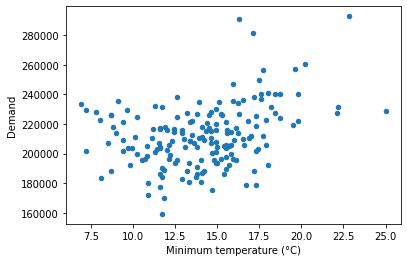

In [52]:
# Scatterplot 1 to visualise Demand vs Minimum Temperature
weather_demand_df.plot(x='Minimum temperature (°C)', y='Demand', kind='scatter')

plt.show()

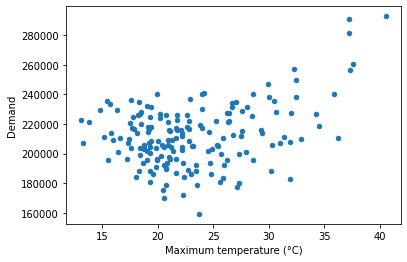

In [53]:
# Scatterplot 2 to visualise Demand vs Maximum Temperature
weather_demand_df.plot(x='Maximum temperature (°C)', y='Demand', kind='scatter')

plt.show()

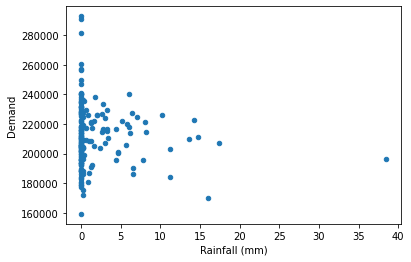

In [54]:
# Scatterplot 3 to visualise Demand vs Rainfall (mm)
weather_demand_df.plot(x='Rainfall (mm)', y='Demand', kind='scatter')

plt.show()

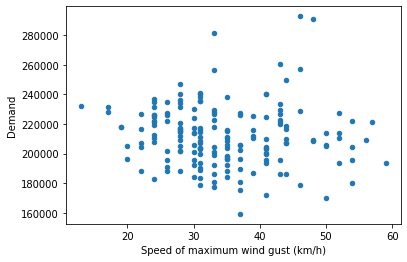

In [55]:
# Scatterplot 4 to visualise Demand vs Maximum wind gust
weather_demand_df.plot(x='Speed of maximum wind gust (km/h)', y='Demand', kind='scatter')

plt.show()

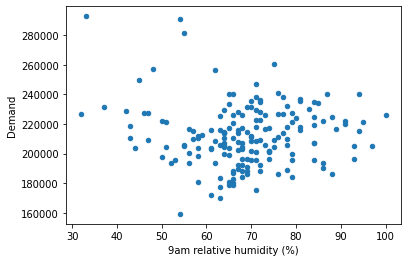

In [56]:
# Scatterplot 5 to visualise Demand vs Humidity (9am)
weather_demand_df.plot(x='9am relative humidity (%)', y='Demand', kind='scatter')

plt.show()

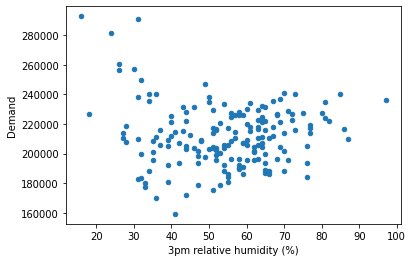

In [57]:
# Scatterplot 6 to visualise Demand vs Humidity (3pm)
weather_demand_df.plot(x='3pm relative humidity (%)', y='Demand', kind='scatter')

plt.show()

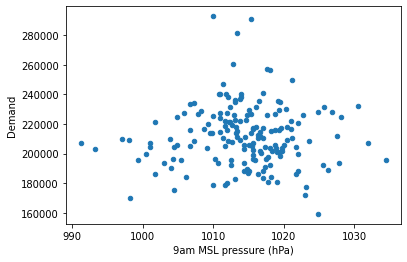

In [58]:
# Scatterplot 7 to visualise Demand vs Pressure (9am)
weather_demand_df.plot(x='9am MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

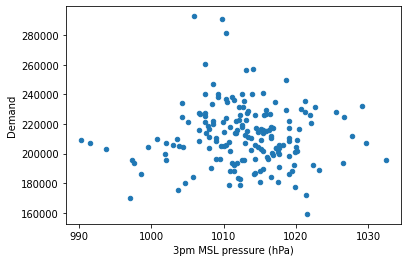

In [59]:
# Scatterplot 8 to visualise Demand vs Pressure (3pm)
weather_demand_df.plot(x='3pm MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

In [60]:
#Use entrophy to check which humidity dataset (9am or 3pm) has less unpredictability
entrophy_3pmHumid = entropy(weather_demand_df['3pm relative humidity (%)'])
print("Entropy of 3pm:", entrophy_3pmHumid)

entrophy_9amHumid = entropy(weather_demand_df['9am relative humidity (%)'])
print("Entropy of 9am:", entrophy_9amHumid)

Entropy of 3pm: 5.118381451486226
Entropy of 9am: 5.142247475557651


In [61]:
# Both Entrophy values are very similar. For Humidity, decide to use 3pm Humidity dataset as it has slightly lower entrophy

In [62]:
# As dataset is summer-spring season. Decide to use Maximum Temperature dataset to analyse temperature

In [63]:
# Determine to use Maximum temperature and Humidity for further analysis. 
# Create new dataframe with these data only

In [64]:
# Extract the Maximum temperature (°C), 3pm relative humidity (%) columns from the weather_demand_df

new_columns = ['Date', 'Maximum temperature (°C)', '3pm relative humidity (%)', 'Demand']

# Create a new DataFrame with the selected columns
temp_humidity_df = weather_demand_df[new_columns].copy()

print(temp_humidity_df)

          Date  Maximum temperature (°C)  3pm relative humidity (%)     Demand
0   2022-11-01                      13.3                       59.0  207429.46
1   2022-11-02                      15.7                       54.0  233630.93
2   2022-11-03                      15.4                       67.0  235672.34
3   2022-11-04                      17.8                       56.0  224895.28
4   2022-11-05                      22.7                       65.0  189190.35
..         ...                       ...                        ...        ...
169 2023-04-19                      17.5                       53.0  220897.61
170 2023-04-20                      18.5                       58.0  227925.10
171 2023-04-21                      19.0                       64.0  232043.13
172 2023-04-22                      19.2                       64.0  207431.82
173 2023-04-23                      19.0                       71.0  195560.35

[174 rows x 4 columns]


In [65]:
# Convert Demand data into smaller number
temp_humidity_df['Demand'] = temp_humidity_df['Demand'].divide(1000).round(2)

# Change the Demand column's header to indicate measurement of Gigawatt (GW) instead of Megawatt (MW)

temp_humid_demand_df = temp_humidity_df.rename(columns={'Demand': 'Demand (GW)'})

print(temp_humid_demand_df)

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  
0         207.43  
1         233.63  
2         235.67  
3         224.90  
4         189.19  
..           ...  
169       220.

In [66]:
# Identify and remove any outliers using z-scores.

def remove_outliers(temp_humid_demand_df, column_name, z_threshold=3):
    """ Standardise data by finding the z-score. 
    z_threshold is the limit set where data is deemed too far from standard mean. 
    Remove outliers and return new dataframe """
    
    # Calculate the z-score for the column
    z_scores = (temp_humid_demand_df[column_name] - temp_humid_demand_df[column_name].mean()) / temp_humid_demand_df[column_name].std()
    
    # Filter out the outliers and return the cleaned DataFrame
    cleaned_data = temp_humid_demand_df[abs(z_scores) < z_threshold]
    return cleaned_data


In [67]:
# Remove outliers in Maximum Temperature and return to temp_humid_demand_df
temp_humid_demand_df = remove_outliers(temp_humid_demand_df, 'Maximum temperature (°C)')

# Check number of data points remaining after removal of Maximum Temperature outliers
print("Number of rows, column:", temp_humid_demand_df.shape)

Number of rows, column: (173, 4)


In [68]:
# One outlier is removed from dataset

In [69]:
# Remove outliers in Maximum Temperature and return to temp_humid_demand_df
temp_humid_demand_df = remove_outliers(temp_humid_demand_df, '3pm relative humidity (%)')

# Check number of data points remaining after removal of outliers
print("Number of rows, column:", temp_humid_demand_df.shape)

Number of rows, column: (173, 4)


In [70]:
# There are no outliers outside the threshold in humidity dataset. No data was removed.

In [71]:
# Use Freedman-Diaconis Rule to determine number of bins required for Maximum temperature data
# Calculate the bin size
temp_iqr = temp_humid_demand_df['Maximum temperature (°C)'].quantile(0.75) - temp_humid_demand_df['Maximum temperature (°C)'].quantile(0.25)
temp_bin_size = 2 * temp_iqr / (len(temp_humid_demand_df['Maximum temperature (°C)']) ** (1/3))

# Calculate the number of bins based on the bin size and the data range
data_min = temp_humid_demand_df['Maximum temperature (°C)'].min()
data_max = temp_humid_demand_df['Maximum temperature (°C)'].max()
num_bins = int((data_max - data_min) / temp_bin_size)

print("Number of Maximum temperature bins:", num_bins)

Number of Maximum temperature bins: 9


In [72]:
# Discretise Maximum temperature into 9 equal length bins
temp_humid_demand_df['Maximum temperature_bins'] = pd.cut(temp_humid_demand_df['Maximum temperature (°C)'], bins=9, labels=False)

# Print the DataFrame and the unique bins
print(temp_humid_demand_df)
print("Unique Bins:", temp_humid_demand_df['Maximum temperature_bins'].unique())

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  Maximum temperature_bins  
0         207.43                         0  
1         233.63                         0  
2         23

In [73]:
# Count the number of datapoints in each bin
bin_counts = temp_humid_demand_df['Maximum temperature_bins'].value_counts()

print(bin_counts)

2    47
3    32
4    24
1    23
5    15
6    11
0     9
8     6
7     6
Name: Maximum temperature_bins, dtype: int64


In [74]:
# Calculate NMI between Maximum temperature and Demand
nmi_temp = normalized_mutual_info_score(temp_humid_demand_df['Maximum temperature_bins'], temp_humid_demand_df['Demand (GW)'])
print("NMI of Maximum temperature and Demand:", nmi_temp)

# Calculate entropy of Maximum temperature
entrophy_temp = entropy(temp_humid_demand_df['Maximum temperature (°C)'])
print("Entropy of Maximum temperature:", entrophy_temp)

# Calculate entropy of Maximum temperature
entrophy_temp = entropy(temp_humid_demand_df['Maximum temperature_bins'])
print("Entropy of Maximum temperature bins:", entrophy_temp)

NMI of Maximum temperature and Demand: 0.552425523587424
Entropy of Maximum temperature: 5.128165149177319
Entropy of Maximum temperature bins: 4.950435321012306


In [78]:
# Use Freedman-Diaconis Rule to determine number of bins required for 3pm Humidity data
# Calculate the bin size
Humid_iqr = temp_humid_demand_df['3pm relative humidity (%)'].quantile(0.75) - temp_humid_demand_df['3pm relative humidity (%)'].quantile(0.25)
Humid_bin_size = 2 * Humid_iqr / (len(temp_humid_demand_df['3pm relative humidity (%)']) ** (1/3))

# Calculate the number of bins based on the bin size and the 3pm humididty data range
data_min = temp_humid_demand_df['3pm relative humidity (%)'].min()
data_max = temp_humid_demand_df['3pm relative humidity (%)'].max()
num_bins = int((data_max - data_min) / Humid_bin_size)

# Print the DataFrame and the number of bins
print("Number of Bins:", num_bins)

Number of Bins: 10


In [79]:
# Discretise 3pm Humidity into 10 equal length bins
temp_humid_demand_df['3pm humidity bins'] = pd.cut(temp_humid_demand_df['3pm relative humidity (%)'], bins=10, labels=False)

# Print the unique bins
print(temp_humid_demand_df)
print("Unique Bins:", temp_humid_demand_df['3pm relative humidity (%)'].unique())

          Date  Maximum temperature (°C)  3pm relative humidity (%)  \
0   2022-11-01                      13.3                       59.0   
1   2022-11-02                      15.7                       54.0   
2   2022-11-03                      15.4                       67.0   
3   2022-11-04                      17.8                       56.0   
4   2022-11-05                      22.7                       65.0   
..         ...                       ...                        ...   
169 2023-04-19                      17.5                       53.0   
170 2023-04-20                      18.5                       58.0   
171 2023-04-21                      19.0                       64.0   
172 2023-04-22                      19.2                       64.0   
173 2023-04-23                      19.0                       71.0   

     Demand (GW)  Maximum temperature_bins  3pm humidity bins  
0         207.43                         0                  5  
1         233.63   

In [80]:
# Count the number of datapoints in each bin
bin_counts = temp_humid_demand_df['Maximum temperature_bins'].value_counts()

print(bin_counts)

2    47
3    32
4    24
1    23
5    15
6    11
0     9
8     6
7     6
Name: Maximum temperature_bins, dtype: int64


In [81]:
# Calculate NMI between Humidity bins and Demand
nmi_humidity = normalized_mutual_info_score(temp_humid_demand_df['3pm humidity bins'], temp_humid_demand_df['Demand (GW)'])
print("NMI of 3pm Humidity bins and Demand:", nmi_humidity)

# Calculate entropy of 3pm humidity
entropy_humidity = entropy(temp_humid_demand_df['3pm relative humidity (%)'])
print("Entropy of 3pm Humidity:", entropy_humidity)

# Calculate entropy of 3pm humidity bins
entropy_humiditybins = entropy(temp_humid_demand_df['3pm humidity bins'])
print("Entropy of 3pm Humidity bins:", entropy_humiditybins)


NMI of 3pm Humidity bins and Demand: 0.5549159539917906
Entropy of 3pm Humidity: 5.114544740772543
Entropy of 3pm Humidity bins: 5.040356215596787


In [85]:
# Renaming dataframe. Save a copy of current dataframe into csv file
temp_humid_bin_df = temp_humid_demand_df
temp_humid_demand_df.to_csv('temp_humid_bin.csv', index=False)